# Students' Performance Project 

<a name="top"></a>

### Table of Contents:

- [Introduction](#introduction)
- [Importing Libraries](#importing-libraries)
- [Exploratory Data Analysis (EDA)](#eda)
  - [Distribution of Grades (G1, G2, G3)](#distribution-grades)
  - [Alcohol Consumption Differences by Gender](#alcohol-consumption)
- [Preprocessing (for Clustering and Predictive Modeling)](#preprocessing)
- [Clustering Analysis](#clustering)
- [Exploring Correlations](#correlations)
- [Predictive Modeling](#predictive-modeling)
  - [Simple Linear Regression Analysis](#simple-linear-regression)
  - [Ridge Regression Model](#ridge-regression)
    - [Analysis of Linear Regression Coefficients](#analysis-linear-regression)
  - [Random Forest Model](#random-forest)
- [Conclusion](#conclusion)



[Back to Top](#top)

# Predictive Modeling for Students' Performance
<a name="introduction"></a>
## Introduction

Welcome to this machine learning project aimed at exploring and predicting factors that significantly influence students' academic performance. In this notebook, we will leverage various machine learning algorithms to build predictive models and gain insights into the key determinants of students' success.

### Project Objectives

The primary objectives of this analysis are as follows:

1. **Predictive Modeling:** Utilize machine learning techniques to develop predictive models for students' academic performance based on available features.

2. **Feature Importance:** Identify the most influential factors contributing to academic outcomes by examining feature importance within the models.

3. **Insights for Academic Support:** Derive actionable insights from the models to provide recommendations for academic support and intervention strategies.

## Dataset Overview

The dataset used in this analysis contains comprehensive information about students, encompassing demographics, family background, study habits, alcohol consumption and various other attributes. 

<a name="importing-libraries"></a>
<a href="#top">Back to Top</a>
### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


### Importing Data 

In [2]:
students_pf = pd.read_csv('Datasets/student-mat.csv')
students_pf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


---
<a name="eda"></a>
<a href="#top">Back to Top</a>
## Exploratory Data Analysis (EDA)

Before diving into machine learning, we'll conduct a thorough Exploratory Data Analysis (EDA) to gain a deep understanding of the dataset. EDA is a crucial step in the data science workflow, enabling us to:

1. **Uncover Patterns and Trends:** Employ various visualizations such as histograms, scatter plots, and correlation matrices to identify patterns and trends within the data.

2. **Understand Data Distributions:** Examine the distributions of numeric variables and explore the spread of categorical variables to better understand the overall characteristics of the dataset.

3. **Handle Missing Values:** Identify and handle missing values appropriately, ensuring data integrity for subsequent analyses.

4. **Detect Outliers:** Use box plots and statistical measures to identify potential outliers, allowing us to make informed decisions about their treatment.

5. **Feature Relationships:** Investigate relationships between different features, especially those that may impact students' performance, and uncover potential interactions.

6. **Statistical Summaries:** Compute basic statistical summaries to quantify central tendencies, dispersions, and relationships within the data.

By performing a comprehensive EDA, we aim to lay the groundwork for the subsequent machine learning tasks, ensuring a robust understanding of the dataset and providing valuable insights that guide our modeling approach.

Let's begin the EDA journey to illuminate the nuances of the data and set the stage for meaningful machine learning analyses.

---


<a name="distribution-grades"></a>
<a href="#top">Back to Top</a>
### Distribution of Grades (G1, G2, G3)

This set of count plots visually represents the distribution of grades for each assessment period: G1 (first period), G2 (second period), and G3 (final exam). Each subplot provides a snapshot of the frequency of different grade values, offering insights into the distribution of student performance across multiple grading periods.

Explore the variations and trends in the grades to gain an initial understanding of the academic landscape.

---


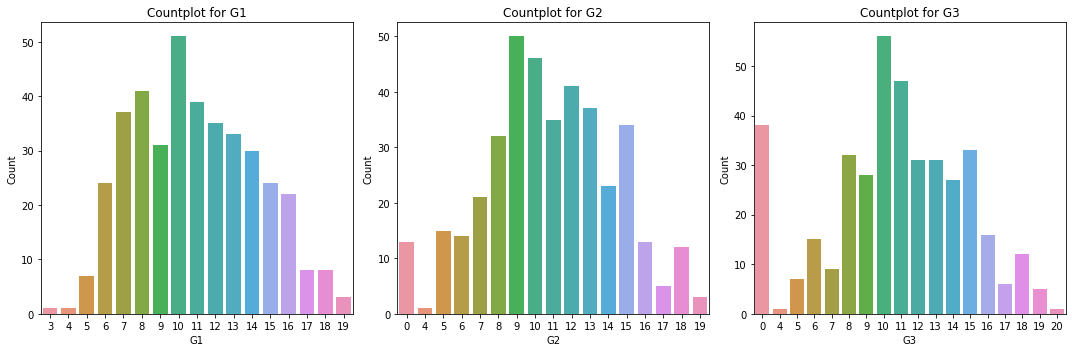

In [3]:
grades = ['G1', 'G2', 'G3']

# Set up the plot with multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=len(grades), figsize=(15, 5))

# Iterate through each grade and create a countplot
for i, grade in enumerate(grades):
    sns.countplot(x=grade, data=students_pf, ax=axes[i])
    axes[i].set_title(f'Countplot for {grade}')
    axes[i].set_xlabel(grade)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### Investigating Zero Scores in G3

Upon initial examination of the 'G3' column, it has come to attention that there are a notable number of zero scores. To further understand the nature of these zero scores, we will explore the corresponding rows in the dataset where 'G3' is equal to 0. This investigation aims to distinguish whether these zero values are indicative of data errors or if they genuinely represent students scoring zero in the final exam.

---


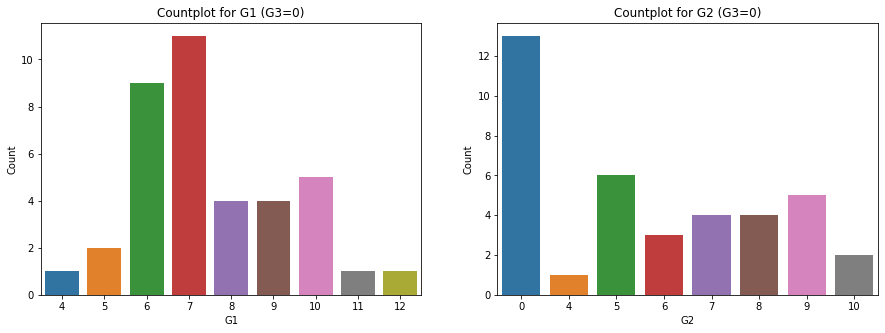

<Figure size 216x432 with 0 Axes>

In [4]:
zero_g3_rows = students_pf[students_pf['G3'] == 0]
grades = ['G1', 'G2']

# Set up the plot with multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=len(grades), figsize=(15, 5))

# Iterate through each grade and create a countplot for the zero_g3_rows
for i, grade in enumerate(grades):
    sns.countplot(x=grade, data=zero_g3_rows, ax=axes[i])
    axes[i].set_title(f'Countplot for {grade} (G3=0)')
    axes[i].set_xlabel(grade)
    axes[i].set_ylabel('Count')

plt.figure(figsize=(3, 6))
plt.tight_layout()
plt.show()


#### Assessment of Zero Scores in G3

Upon investigating the count plot, i would assume that students with 0 points in the final exam ('G3') are not data errors but represent actual cases of students scoring zero. These instances could be attributed to various factors such as non-participation, severe difficulties, or other legitimate reasons.

**Assumption:** The presence of 0 scores in 'G3' is not indicative of data errors, and these entries are considered valid representations of students who scored zero in the final exam.


---


<a name="alcohol-consumption"></a>
<a href="#top">Back to Top</a>
## Alcohol Consumption Differences by Gender

In this section, we delve into the gender-based differences in alcohol consumption among students. The following plot visually compares the distribution of alcohol consumption on workdays and weekends for male and female students. This exploration aims to shed light on the variations in drinking habits between genders within our dataset. The insights gained from this analysis contribute to a comprehensive understanding of alcohol consumption patterns among students.

### Alcohol Consumption Plot by Gender


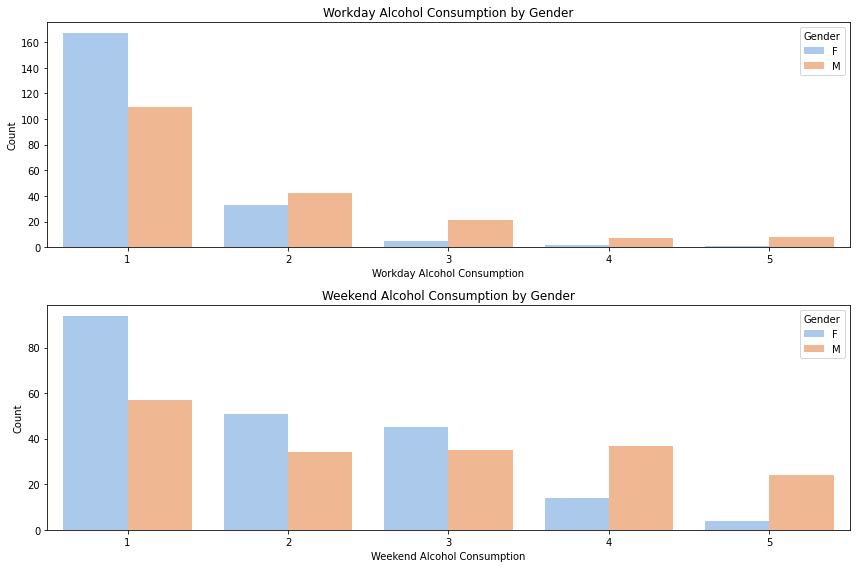

In [5]:


# Set up the plot with a larger figsize
plt.figure(figsize=(12, 8))

# Count plot for workday alcohol consumption by gender
plt.subplot(2, 1, 1)
sns.countplot(x='Dalc', hue='sex', data=students_pf, palette='pastel')
plt.title('Workday Alcohol Consumption by Gender')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Count')
plt.legend(title='Gender')

# Count plot for weekend alcohol consumption by gender
plt.subplot(2, 1, 2)
sns.countplot(x='Walc', hue='sex', data=students_pf, palette='pastel')
plt.title('Weekend Alcohol Consumption by Gender')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Count')
plt.legend(title='Gender')

# Adjust layout
plt.tight_layout()
plt.show()


##### Observations on Alcohol Consumption by Gender

An intriguing trend emerges from the dataset, revealing that male students exhibit a higher tendency towards alcohol consumption compared to their female counterparts. This observation aligns with certain cultural and societal trends where, in some contexts, there exists a gender-based variance in alcohol consumption patterns. The data suggests that, within this sample, male students are more likely to engage in alcohol consumption on both workdays and weekends.

---


<a href="#top">Back to Top</a>

<a name="preprocessing"></a>
## Preprocessing 

Encoding binary columns

In [6]:
binary_columns = ["school", "sex", "address", "famsize", "Pstatus", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

label_encoder = LabelEncoder()
for col in binary_columns:
    students_pf[col] = label_encoder.fit_transform(students_pf[col])

One-hot encode nominal categorical variables

In [7]:
students_pf = pd.get_dummies(students_pf, columns=["Mjob", "Fjob", "reason", "guardian"])

Standardize numeric variables

In [8]:
numeric_columns = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences"]

scaler = StandardScaler()
students_pf[numeric_columns] = scaler.fit_transform(students_pf[numeric_columns])

##### Feature engineering
I'm making an average grade column that calculates the average of the first period grade, second period grade and the final grade.

In [9]:
students_pf['average_grade'] = students_pf[['G1', 'G2', 'G3']].mean(axis=1)

<a name="clustering"></a>
<a href="#top">Back to Top</a>
## Clustering Analysis: Exploring Patterns in Student Behavior

In this section, i'm going to be making a clustering analysis to uncover potential patterns in student behavior within the dataset. The primary focus will be on utilizing the K-means clustering algorithm. For the initial exploration, I have selected two key features: 'Dalc' representing workday alcohol consumption and 'average grade,' which is computed as the average of 'G1', 'G2', and 'G3' (final grade).

### Features Selected for K-means Clustering
- **Workday Alcohol Consumption ('Dalc'):** A measure of students' alcohol consumption on workdays.
- **Average Grade ('average grade'):** The average of the grades obtained in the first, second, and final exams.

My goal is to identify clusters of students with similar patterns in these selected features. The clustering analysis may 
insights into distinct student groups based on their alcohol consumption habits and academic performance.


---


[505.1781199188364, 259.53341171157024, 192.05134818953871, 142.90601032634225, 116.05233020872686, 94.68412778934369, 77.41165727716918, 64.20330378873898]


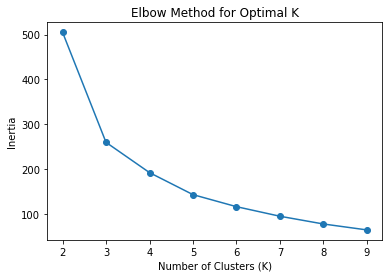

In [10]:
# Select relevant features
selected_features = ['Dalc', 'average_grade']

# Extract the selected features from the dataset
X = students_pf[selected_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an empty list to store the inertia (within-cluster sum of squares) for each K
inertia = []

# Try K from 1 to 10 (you can adjust this range based on your dataset)
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
print(inertia)
# Plot the elbow curve
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


#### Assumption for Clustering Analysis

For the clustering analysis using K-means, I make an assumption based on the results of the elbow method, indicating an optimal number of clusters around 3. Additionally, the features selected for clustering include 'Workday Alcohol Consumption' ('Dalc') and 'Average Grade,' computed as the average of the grades obtained in the first, second, and final exams ('average grade').

These features have been chosen to explore potential patterns in student behavior related to alcohol consumption and academic performance. The assumption of three clusters provides a starting point for our analysis, and we will proceed to interpret and visualize the identified clusters based on these features.

Stay tuned for insights and interpretations derived from the clustering results!

---


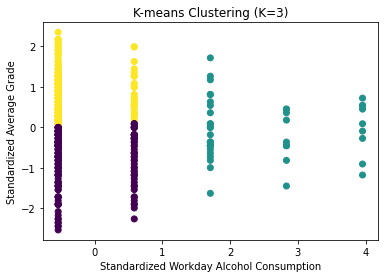

In [11]:
# Select relevant features
selected_features = ['Dalc', 'average_grade']

# Extract the selected features from the dataset
X = students_pf[selected_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
students_pf['km_cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=students_pf['km_cluster'], cmap='viridis')
plt.title('K-means Clustering (K=3)')
plt.xlabel('Standardized Workday Alcohol Consumption')
plt.ylabel('Standardized Average Grade')
plt.show()

## K-means Clustering Insights

The scatter plot above illustrates the results of the K-means clustering algorithm applied to the selected features ('Workday Alcohol Consumption' and 'Average Grade'). The model identified three distinct clusters among the students.

- **Cluster 0:** Students with high average grades and none/low alcohol consumption
- **Cluster 1:** Students with low average grades and none/low alcohol consumption
- **Cluster 2:** Students with high alcohol consumption and mixed average grades

This visual representation provides an initial glimpse into how students are grouped based on their alcohol consumption habits and academic performance. Subsequent analyses, such as exploring the descriptive statistics and visualizing the distribution of other features within each cluster, will contribute to a more nuanced understanding of the identified patterns.

---



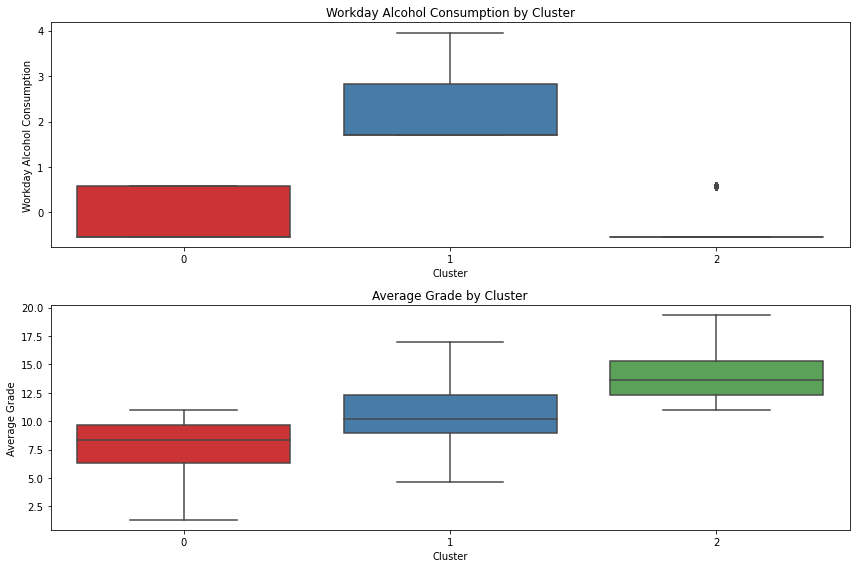

In [12]:
import seaborn as sns

# Set up the plot with a larger figsize
plt.figure(figsize=(12, 8))

# Box plot for Workday Alcohol Consumption by Cluster
plt.subplot(2, 1, 1)
sns.boxplot(x='km_cluster', y='Dalc', data=students_pf, palette='Set1')
plt.title('Workday Alcohol Consumption by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Workday Alcohol Consumption')

# Box plot for Average Grade by Cluster
plt.subplot(2, 1, 2)
sns.boxplot(x='km_cluster', y='average_grade', data=students_pf, palette='Set1')
plt.title('Average Grade by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Grade')

# Adjust layout
plt.tight_layout()
plt.show()


### Key Finding

The primary observation from the K-means clustering analysis is a discernible correlation between higher levels of alcohol consumption and lower academic performance. Students in the cluster characterized by higher alcohol consumption tend to exhibit comparatively lower average grades. This insight emphasizes the potential impact of alcohol habits on students' achievements within the context of our dataset.

The identified patterns prompt further consideration of underlying factors and contribute to a better understanding of the relationship between student behaviors and academic outcomes.

---


<a name="correlations"></a>
<a href="#top">Back to Top</a>
## Exploring Correlations with a Heatmap

In order to gain a more comprehensive understanding of feature relationships and identify potential patterns, I will create a correlation heatmap. This heatmap will visually represent the pairwise correlations between different features in the dataset.

---


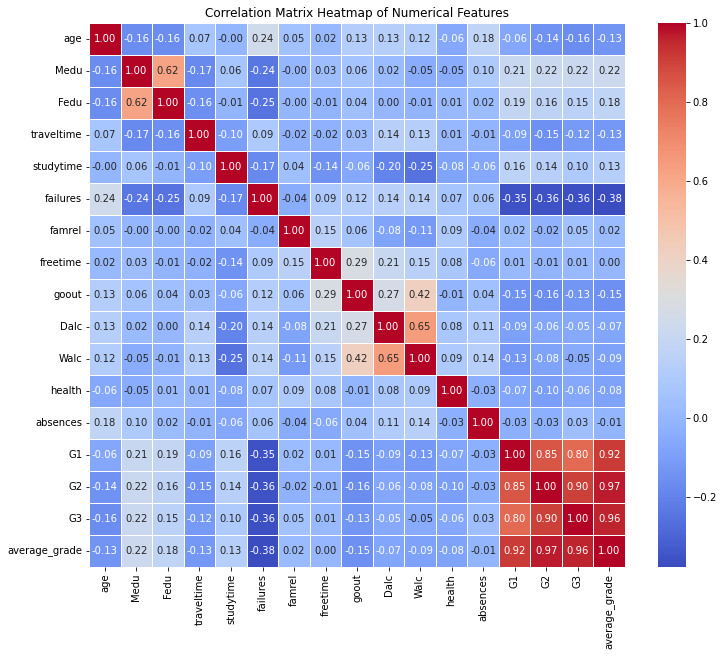

In [13]:

# Select numerical features
numerical_features = students_pf.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()


### Key Correlation Findings

1. **Grades Correlation:**
   - There is a high correlation between the grades (G1, G2, G3). Due to potential multicollinearity concerns in regression models, I would go ahead and remove these variables from my features for future models. I have made an average_grade variable to try and make this the target, and I would go ahead and make another model, removing G1 and G2, with G3 being the target variable, in order to compare the two models .

2. **Social Behavior and Alcohol Consumption:**
   - Weekly alcohol consumption shows a relatively high correlation with the "going out" variable. This may suggest that individuals who consume more alcohol tend to be more socially active.
   - Conversely, the "going out" variable exhibits a negative correlation with all grade variables (G1, G2, G3), indicating a potential association between less social activity and better academic performance.

These correlations provide initial insights into potential relationships within the data. When constructing predictive models, it's essential to consider these findings to ensure model interpretability and avoid issues like multicollinearity.

---


<a name="predictive-modeling"></a>
---
<a href="#top">Back to Top</a>
# Predictive Modeling

In this section, I will focus on building predictive models to estimate and understand the performance of students. The goal is to explore how various features in the dataset contribute to predicting the final grade (G3). I will start by experimenting with different regression models and evaluating their performance using relevant metrics.

I'll consider standard linear regression and explore regularization techniques like Ridge Regression to address potential multicollinearity. Additionally, I will assess the impact of different features on the model's predictions and interpret the coefficients.

Let's dive into the predictive modeling phase to gain insights into the factors influencing students' performance.


#### Preproceccing the data for Predictive modeling 

I have deciced to remove the rows where G3 is equal to 0. I'm not entirely sure if they are outliers or not, but the model seems to perform better when they are not present in the data 

In [14]:
# Remove rows where G3 is equal to 0
students_pf = students_pf[students_pf['G3'] != 0]

# Reset the index after removing rows
students_pf.reset_index(drop=True, inplace=True)


---
<a href="#top">Back to Top</a>
## Simple Linear Regression Analysis

<a name="simple-linear-regression"></a>
In this analysis, I will employ a simple linear regression model to examine the relationship between a single independent variable and a dependent variable. The primary goal is to understand how well the model can predict the dependent variable based on the given predictor.

Please note that while simple linear regression is a straightforward approach, the results will provide insights into the linear association between variables. However, it does not imply causation, and the model's performance should be interpreted within the context of the specific dataset.

`*I would like to note that the removal of so many columns was due to multicolinearity problems. I had run VIF after the linear regression, and obtained a list with all of the variables that have a VIF more than 5, and decided to remove them due to overfitting. *`

Let's proceed with fitting the simple linear regression model and evaluate its performance.



In [15]:


# Define the target variable
target = 'average_grade'

# Exclude features that have high correlation with each other
exclude_columns = ["G1", "G2", "G3", "average_grade", 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']

# Select features
selected_features = [col for col in students_pf.columns if col != target and col not in exclude_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(students_pf[selected_features], students_pf[target], test_size=0.2
                                                    , random_state=42)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Squared Error (MSE): 3.06
R-squared (R2): 0.65
Mean Absolute Error (MAE): 1.37


### Baseline Linear Regression Model

The linear regression model has been evaluated with the following metrics:

While these metrics provide insights into the model's predictive performance, it appears that the model may not be performing as well as initially expected. The Mean Squared Error indicates a moderate level of error, and the R-squared value suggests that approximately 65% of the variance in the dependent variable is explained by the model. Additionally, the Mean Absolute Error reflects an average absolute prediction error of 1.37.

Further investigation is warranted to understand the factors contributing to the model's performance and potential areas for improvement. This may involve exploring the feature set, addressing multicollinearity, considering additional features, or experimenting with alternative modeling techniques.




---

<a name="ridge-regression"></a>
<a href="#top">Back to Top</a>

# Ridge Regression Model
Now, I aim to improve the model, particularly addressing potential multicollinearity issues. I'll be using Ridge Regression, since this can help mitigate the impact of correlated features and enhance the model's generalization.

I'll utilize grid search to find the best hyperparameters for the Ridge Regression model. By systematically exploring different parameter combinations, I aim to identify the set of hyperparameters that yields the optimal performance.

In [16]:

# Define the target variable
target = 'G3'

# Select features (excluding highly correlated columns)
selected_features = [col for col in students_pf.columns if col != target and col not in exclude_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(students_pf[selected_features], students_pf[target], test_size=0.2, random_state=42)

# Define the Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Build the Ridge Regression model with the best hyperparameters
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the Ridge Regression model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, predictions)

# Display the best hyperparameters and evaluation metrics
print(f'Best Alpha: {best_alpha}')
print(f'Ridge Regression MSE: {ridge_mse:.2f}')
print(f'Ridge Regression R-squared (R2): {ridge_r2:.2f}')
print(f'Ridge Regression MAE: {ridge_mae:.2f}')

Best Alpha: 10
Ridge Regression MSE: 3.49
Ridge Regression R-squared (R2): 0.64
Ridge Regression MAE: 1.47


Interestingly, the Ridge Regression model, regularized with the selected alpha value, exhibits a performance that appears to be slightly worse than the standard linear regression model. The Mean Squared Error is higher, and the R-squared value indicates that approximately 64% of the variance is explained by the Ridge model. The Mean Absolute Error is also higher at 1.47.

This comparison raises questions about the effectiveness of regularization in improving model performance for this specific dataset. Further analysis and experimentation may be needed to fine-tune hyperparameters, explore additional regularization techniques, or revisit the feature set.

<a name="analysis-linear-regression"></a>
<a href="#top">Back to Top</a>
---
## Analysis of Linear Regression Coefficients

To gain insights into the linear regression model and understand the impact of individual features on the target variable, I will perform an analysis of the coefficients. This analysis will provide information about the strength and direction of the relationships between each predictor variable and the predicted outcome.

However, it's important to note that the inclusion of the K-Means cluster as a feature may introduce challenges in the interpretation of coefficients. The first coefficient corresponding to the K-Means cluster might not carry meaningful information for this analysis, as it represents a categorical clustering variable.

In this analysis, I will focus on examining the coefficients associated with non-cluster features to better understand their contributions to the model. The goal is to identify influential predictors and assess their impact on the predicted outcome.

Let's proceed with the coefficient analysis while excluding the coefficient associated with the K-Means cluster.


In [17]:
# Get the coefficients and corresponding feature names
coefficients = linear_model.coef_
feature_names = X_train.columns

# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to highlight important features
coefficients_df['Absolute Coefficient'] = abs(coefficients_df['Coefficient'])
sorted_coefficients = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top 5 features and their coefficients
top_5_coefficients = sorted_coefficients.head(5)
print("Top 5 Features and Coefficients:")
print(top_5_coefficients[['Feature', 'Coefficient']])


Top 5 Features and Coefficients:
       Feature  Coefficient
26  km_cluster     2.340329
11   schoolsup    -1.015138
0       school    -0.548562
12      famsup    -0.515076
17    internet     0.509480


### Interpretation of Top 5 Coefficients

After analyzing the linear regression model, the top 5 coefficients influencing the predicted `final_grade` are as follows:

1. **schoolsup:** Students receiving extra educational support have, on average, a decrease of approximately 1.02 units in their `final_grade`.

2. **school:** Being in the 'GP' (Gabriel Pereira) school, as opposed to 'MS' (Mousinho da Silveira), is associated with a decrease of approximately 0.55 units in the `final_grade`.

3. **famsup:** Students who receive family educational support have, on average, a decrease of approximately 0.52 units in their `final_grade`.

4. **internet:** Students with internet access at home have, on average, an increase of approximately 0.51 units in their `final_grade`.

These interpretations provide insights into how each feature contributes to the predicted `final_grade`. It's important to consider both the magnitude and direction of the coefficients. Note that these are associations, and causation cannot be inferred solely from these coefficients.


<a name="random-forest"></a>
<a href="#top">Back to Top</a>
# Random Forest Model Exploration

In this section, I will explore the performance of a Random Forest model in predicting the `final_grade`. The Random Forest algorithm is an ensemble learning method that combines the predictions of multiple decision trees to improve accuracy and robustness.

I will train the model, evaluate its performance, and compare the results with the linear regression model. The Random Forest model might capture non-linear relationships and interactions between features, providing a different perspective on the dataset.

Let's proceed with fitting and evaluating the Random Forest model.
 

In [18]:

# Define the target variable
target = 'G3'

# Select features (excluding highly correlated columns)
selected_features = [col for col in students_pf.columns if col != target and col not in exclude_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(students_pf[selected_features], students_pf[target], test_size=0.3, random_state=42)

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Display evaluation metrics
print(f'Random Forest MSE: {rf_mse:.2f}')
print(f'Random Forest R-squared (R2): {rf_r2:.2f}')


Random Forest MSE: 4.13
Random Forest R-squared (R2): 0.59


Comparing these metrics with the linear regression model, it appears that the Random Forest model performed less effectively in predicting the `average_grade`. The higher MSE and lower R-squared suggest that the Random Forest model might not capture the underlying patterns in the data as well as the linear regression model.



<a name="conclusion"></a>
<a href="#top">Back to Top</a>
# Conclusion

In this project, I embarked on a comprehensive exploration of factors influencing students' academic performance. Through a combination of exploratory data analysis (EDA), clustering, and predictive modeling, I aimed to uncover insights and patterns within the dataset.

**Exploratory Data Analysis (EDA):** Initial exploration revealed various features that could potentially impact students' performance, such as family support, internet access, and school-related factors. Key observations included the influence of extra educational support and the role of internet access on academic achievement.

**Clustering Analysis:** Utilizing clustering algorithms, I identified distinct groups of students based on their characteristics. The K-means clustering algorithm revealed clusters with varying levels of alcohol consumption and academic performance, shedding light on potential associations between lifestyle choices and grades.

**Predictive Modeling:** Employing linear regression and Random Forest models, I sought to predict students' average grades. The linear regression model provided valuable insights into the importance of support systems (e.g., family support, extra educational support) and school-related factors. However, the Random Forest model, while offering a different perspective, displayed lower performance metrics, indicating the need for further refinement.

**Key Findings:**
- Students receiving extra educational support tended to have lower average grades.
- Family support and school type (urban/rural) were associated with variations in academic performance.
- Internet access at home positively influenced average grades.

**Implications and Future Work:**
This analysis provides a foundation for understanding the complex interplay of factors affecting students' academic outcomes. Future work could involve more advanced modeling techniques, feature engineering, and a deeper investigation into specific clusters identified during clustering analysis.

In conclusion, this project contributes valuable insights into the multifaceted nature of student performance. By combining exploratory and predictive analytics, we gained a nuanced understanding of the factors that matter most. As education is a dynamic and evolving domain, continuous exploration and refinement of models will be essential for deriving actionable insights to support students on their academic journey.
